<h1 align=center> 应用系统体系架构 - 人工智能模块 </h1>

<h1 align=center> A2：卷积神经网络实例 - CIFAR10</h1>
<br/>


### 关于这个Notebook

在这个Notebook中，我们将展示如何通过构建卷积神经网络来对CIFAR-10数据集中的图像进行分类。

### 构建对CIFAR-10数据集中的图像进行分类的CNN

我们将处理CIFAR-10数据集，这是一个非常出名的图像分类数据集，包含了60000张 32×32 的彩色图像，图像的内容分属于10种类别，每种类别6000张。这些图像中，50000张用于训练，10000张用于测试。

图像所属的10个类别为：

<ol start="0">
<li> 飞机 airplane
<li> 汽车 automobile
<li> 鸟 bird
<li> 猫 cat
<li> 鹿 deer
<li> 狗 dog
<li> 青蛙 frog
<li> 马 horse
<li> 船 ship
<li> 卡车 truck
</ol>

有关 CIFAR-10 的详细内容可以参阅：
https://www.cs.toronto.edu/~kriz/cifar.html

在下面的网页上，汇集了在 CIFAR-10 数据集上进行分类的发表在论文中的性能结果：
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### 构建卷积神经网络(Convolutional Neural Nets)

我们将使用Keras来构建和训练我们自己的第一个卷积神经网络。在第一部分，我们将堆叠各个层，并对它们进行配置。在第二部分，你需要构建并训练自己的模型，并比较它的性能。

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape
x_train[444]

array([[[135, 163, 168],
        [134, 160, 164],
        [135, 160, 163],
        ...,
        [146, 169, 173],
        [151, 166, 173],
        [153, 168, 175]],

       [[140, 166, 173],
        [136, 164, 171],
        [136, 165, 172],
        ...,
        [158, 174, 171],
        [168, 179, 176],
        [187, 197, 194]],

       [[141, 166, 173],
        [136, 163, 171],
        [135, 164, 173],
        ...,
        [199, 207, 196],
        [217, 222, 209],
        [232, 237, 224]],

       ...,

       [[ 28,  21,  18],
        [ 28,  20,  17],
        [ 38,  30,  27],
        ...,
        [ 21,  21,  20],
        [ 18,  24,  14],
        [ 34,  28,  18]],

       [[ 56,  44,  39],
        [ 68,  56,  51],
        [ 76,  65,  59],
        ...,
        [ 26,  20,  17],
        [ 32,  27,  18],
        [ 43,  31,  22]],

       [[ 97,  79,  68],
        [102,  85,  74],
        [105,  88,  77],
        ...,
        [ 66,  51,  43],
        [ 74,  56,  47],
        [ 86,  67,  57]]

[9]


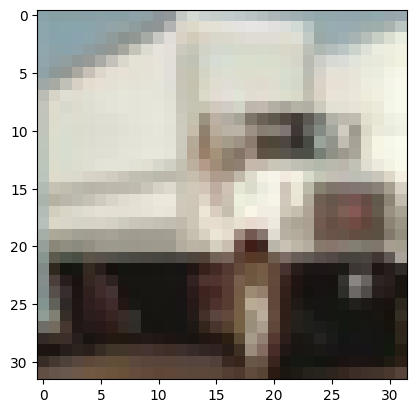

In [6]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [7]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [9]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras 中用于 CNN 的层
- 之前我们使用过基础的 Dense、Activation 和 Dropout 层构建过神经网络。

- 现在我们将描述如何使用Keras中提供的与CNN相关的一些层。

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

其中若干个参数的含义：
- `filters`: 每个位置使用的过滤器数量，换句话说，就是输出的深度。
- `kernel_size`: 一个 (x,y) 元素，给出了要使用的卷积核的高度和宽度。
- `strides`: 一个 (x,y) 元素，给出了在每一维上的步幅。默认值为 `(1,1)`
- `input_shape`: 只有第一层需要这个参数，表示输入的形状。

注意，输出的尺寸是由 kernel_size 和 strides 确定的。

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: 要池化的网格的 (x,y) 尺寸。
- `strides`: 假设等于 `pool_size` ，除非另外做了设定。

### Flatten
将其输入转换为一维向量。通常用于从卷积层转移到全连接层时。

---

## 第一个CNN
下面我们将构建第一个CNN。出于演示的考虑，训练不应该花费过多时间，所以这个网络不是很深，参数数量也相对较少。我们在前两个卷积层中设置步幅为2，这样可以快速降低输出的维度。之后是一个 MaxPooling 层，然后我们做摊平操作，之后，在进入最终的分类层之前，还有一个全连接层。

In [11]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

/Users/haopengchen/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

我们仍旧有 181K 个参数需要训练，尽管这只是一个“小”模型。


In [13]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

/Users/haopengchen/anaconda3/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2864 - loss: 1.9400 - val_accuracy: 0.4639 - val_loss: 1.4885
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4554 - loss: 1.5066 - val_accuracy: 0.5390 - val_loss: 1.2887
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5087 - loss: 1.3806 - val_accuracy: 0.5437 - val_loss: 1.3063
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5360 - loss: 1.3066 - val_accuracy: 0.5743 - val_loss: 1.1876
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5554 - loss: 1.2520 - val_accuracy: 0.5924 - val_loss: 1.1465
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5740 - loss: 1.2088 - val_accuracy: 0.5999 - val_loss: 1.1228
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5853 - loss: 1.1815 - val_accuracy: 0.6111 - val_loss: 1.0978
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5919 - loss: 1.1619 - 

### 练习
之前的模型结构如下：

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(中间还有激活函数和dropout)

<ol>
<li>用下面的模式构建一个更复杂的模型:</li>
    <ul>
    <li>- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification</li>
    <li>- 所有的卷积层的步幅都为1。</li>
    </ul>
    <br/>
<li>这个模型有多少个参数？与之前的模型相比如何？</li>

<li>训练 5 代，你有没有注意到训练的时间、损失和准确率等几个数字有什么变化？</li>

<li>尝试用一些不同的结构，然后运行数次，看看模型的准确率如何。</li>
</ol>

In [15]:
# Let's build a CNN using Keras' Sequential capabilities

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [16]:
## Check number of parameters

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(learning_rate=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [18]:
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.3279 - loss: 1.8254 - val_accuracy: 0.5621 - val_loss: 1.2354
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5581 - loss: 1.2453 - val_accuracy: 0.6350 - val_loss: 1.0395
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6256 - loss: 1.0657 - val_accuracy: 0.6758 - val_loss: 0.9197
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6724 - loss: 0.9423 - val_accuracy: 0.7087 - val_loss: 0.8326
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7009 - loss: 0.8665 - val_accuracy: 0.6811 - val_loss: 0.9074
